# 6.86x - Introduction to ML Packages (Part 1)

This tutorial is designed to provide a bird's eye view of the ML packages landscape.
The goal is not to give an in-depth explanation of all the features of each packages, but rather demonstrate the purpose of a few widely used ML packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

You can go through the Jupyter, Numpy and Matplotlib sections before the course starts, and then start studying the next sections after you have completed unit 1.


https://github.com/varal7/ml-tutorial


## Jupyter

[Jupyter](https://jupyter.org) is not strictly speaking an ML package. It provides a browser front-end connected to an instance of IPython which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for prototyping, demonstrations and tutorials, but terrible for actual coding.


In [1]:
6 * 7

42

In [2]:
def tokenize(text):
    return text.split(" ")

In [3]:
text = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley"
print(tokenize(text))

['In', 'a', 'shocking', 'finding,', 'scientist', 'discovered', 'a', 'herd', 'of', 'unicorns', 'living', 'in', 'a', 'remote,', 'previously', 'unexplored', 'valley']


## Numpy


In [4]:
import numpy as np

[Numpy](http://www.numpy.org) is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop


In the Numpy tutorial, we have covered the basics of Numpy, numpy arrays, element-wise operations, matrices operations and generating random matrices.
In this section, we'll cover indexing, slicing and broadcasting, which are useful concepts that will be reused in `Pandas` and `PyTorch`.


### Indexing and slicing


Numpy arrays can be indexed and sliced like regular python arrays


In [5]:
a_py = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a_np = np.array(a_py)

In [6]:
print(a_py[3:7:2], a_np[3:7:2])
print(a_py[2:-1:2], a_np[2:-1:2])
print(a_py[::-1], a_np[::-1])

[4, 6] [4 6]
[3, 5, 7] [3 5 7]
[9, 8, 7, 6, 5, 4, 3, 2, 1] [9 8 7 6 5 4 3 2 1]


But you can also use arrays to index other arrays


In [7]:
idx = np.array([7, 2])
a_np[idx]

array([8, 3])

In [8]:
# a_py[idx]

Which allows convenient querying, reindexing and even sorting


In [9]:
ages = np.random.randint(low=30, high=60, size=10)
heights = np.random.randint(low=150, high=210, size=10)

print(ages)
print(heights)

[36 56 35 51 55 30 48 42 34 58]
[194 155 167 158 165 190 180 184 165 200]


In [10]:
print(ages < 50)

[ True False  True False False  True  True  True  True False]


In [11]:
print(heights[ages < 50])
print(ages[ages < 50])

[194 167 190 180 184 165]
[36 35 30 48 42 34]


In [12]:
shuffled_idx = np.random.permutation(10)
print(shuffled_idx)
print(ages[shuffled_idx])
print(heights[shuffled_idx])

[0 6 9 3 5 2 1 8 7 4]
[36 48 58 51 30 35 56 34 42 55]
[194 180 200 158 190 167 155 165 184 165]


In [13]:
sorted_idx = np.argsort(ages)
print(sorted_idx)
print(ages[sorted_idx])
print(heights[sorted_idx])

[5 8 2 0 7 6 3 4 1 9]
[30 34 35 36 42 48 51 55 56 58]
[190 165 167 194 184 180 158 165 155 200]


### Broadcasting


When Numpy is asked to perform an operation between arrays of differents sizes, it "broadcasts" the smaller one to the bigger one.


In [14]:
a = np.array([4, 5, 6])
b = np.array([2, 2, 2])
a * b

array([ 8, 10, 12])

In [15]:
a = np.array([4, 5, 6])
b = 2
a * b

array([ 8, 10, 12])

The two snippets of code above are equivalent but the second is easier to read and also more efficient.


In [16]:
a = np.arange(10).reshape(1, 10)
b = np.arange(12).reshape(12, 1)

In [17]:
print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [18]:
print(a * b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


## Matplotlib


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
plt.rcParams["figure.figsize"] = [10, 7]

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like that a lot of people have learned to use and love, and an object-oriented API that we recommend using.


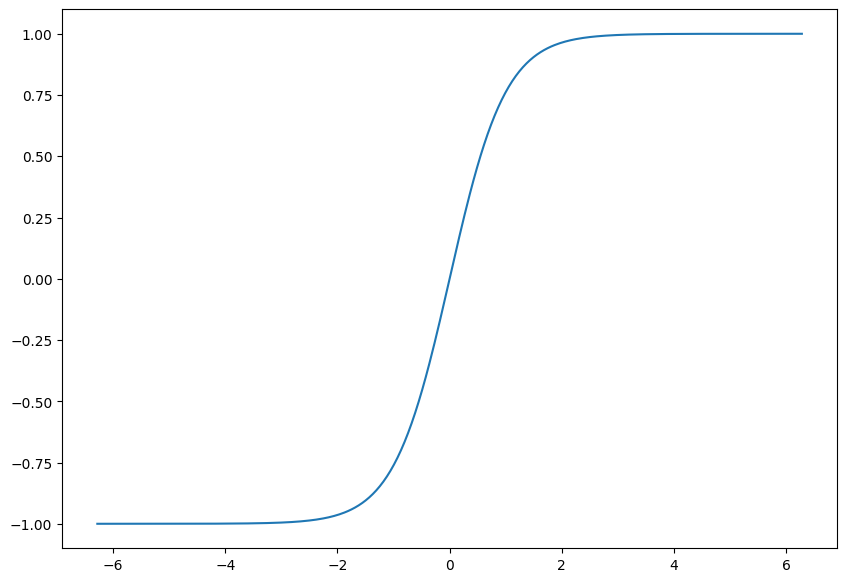

In [21]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x, y)

You can plot multiple subplots in the same figure, or multiple functions in the same subplot


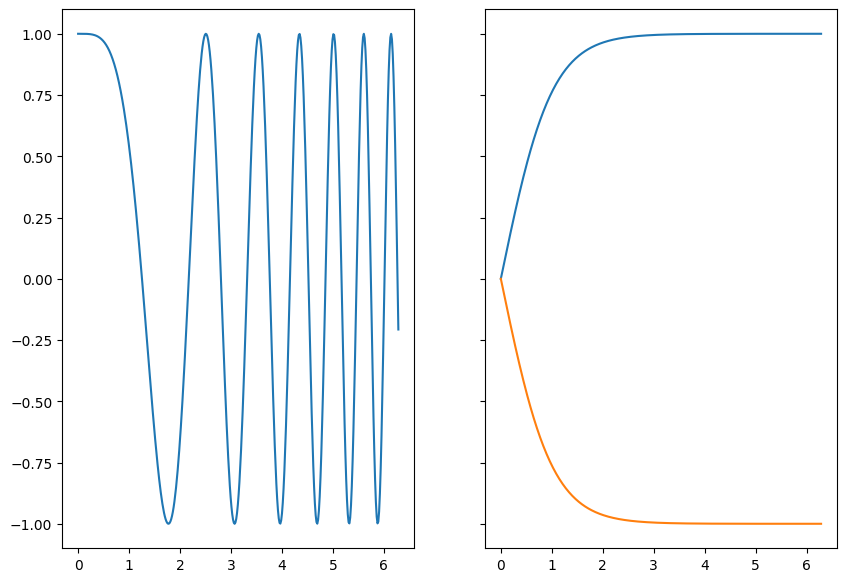

In [22]:
x = np.linspace(0, 2 * np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[1].plot(x, y1)
axes[1].plot(x, -y1)
axes[0].plot(x, y2)

Matplotlib also comes with a lot of different options to customize, the colors, the labels, the axes, etc.

For instance, see this [introduction to matplotlib](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)


## Scikit-learn (read this after you have completed unit 1)


[Scikit-learn](https://scikit-learn.org/) includes a number of features and utilities to kickstart your journey in Machine Learning.


### A toy example


In [23]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]),
 array([0, 0, 0, 1, 1]))

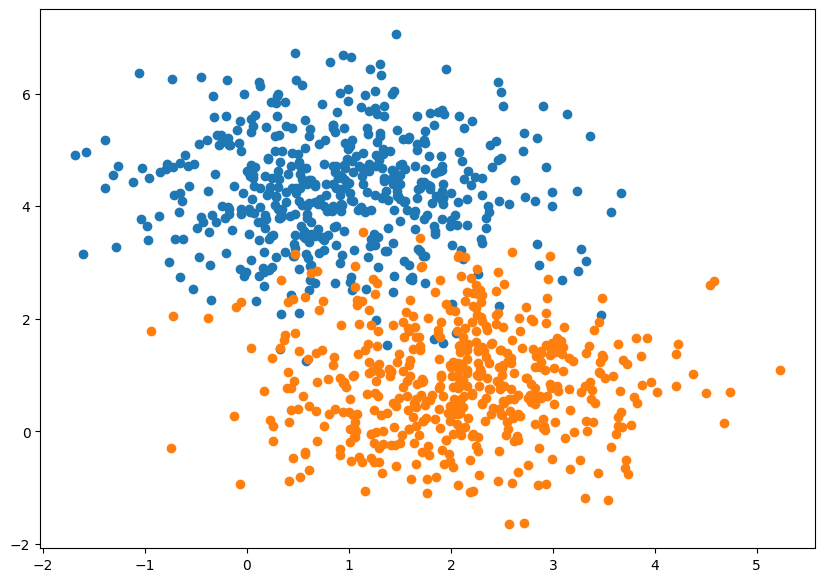

In [25]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = y == label
    ax.scatter(X[mask, 0], X[mask, 1])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

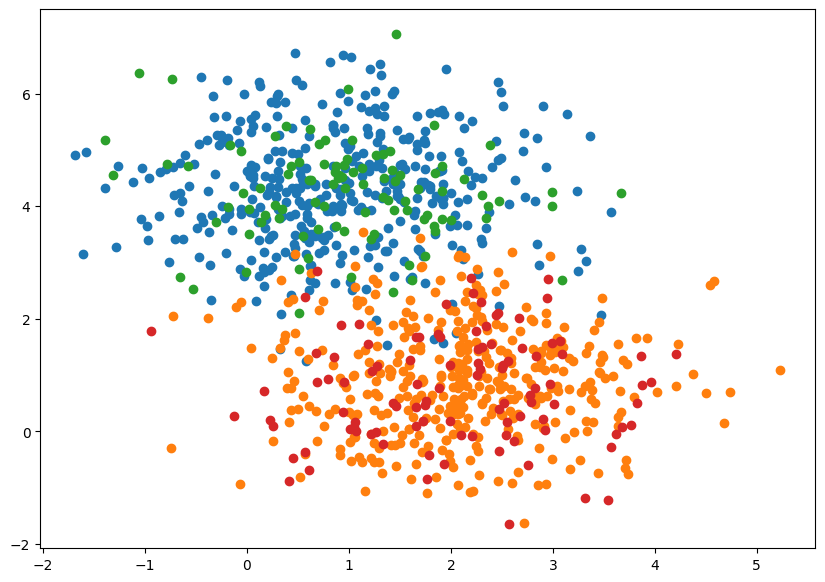

In [28]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = y_train == label
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = y_test == label
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

Sklearn uses a uniform and very consistent API, making it easy to switch algorithms


For instance, training and predicting with a perceptron.


In [29]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Test accuracy: %.4f" % accuracy_score(y_test, y_pred))

Test accuracy: 0.9250


In [32]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

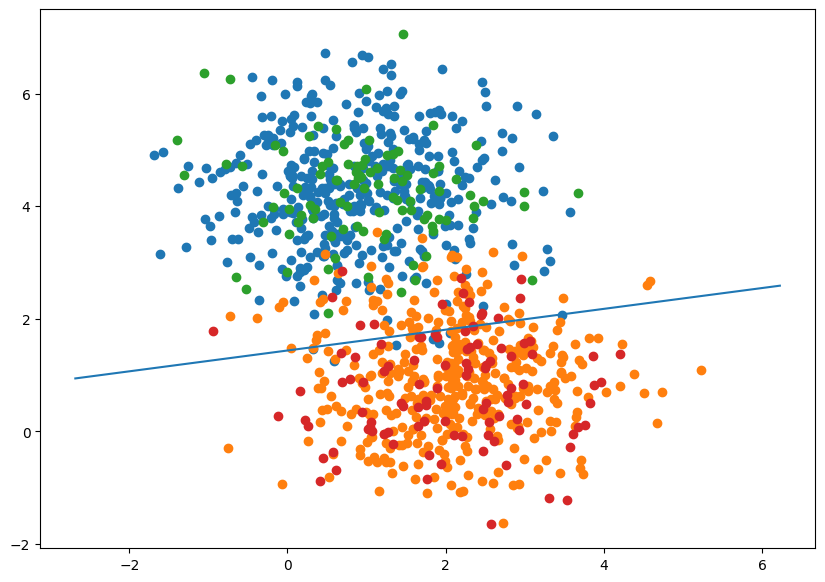

In [33]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = y_train == label
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = y_test == label
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 400)
y_bnd = -x_bnd * (theta[0] / theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)

### Another toy example


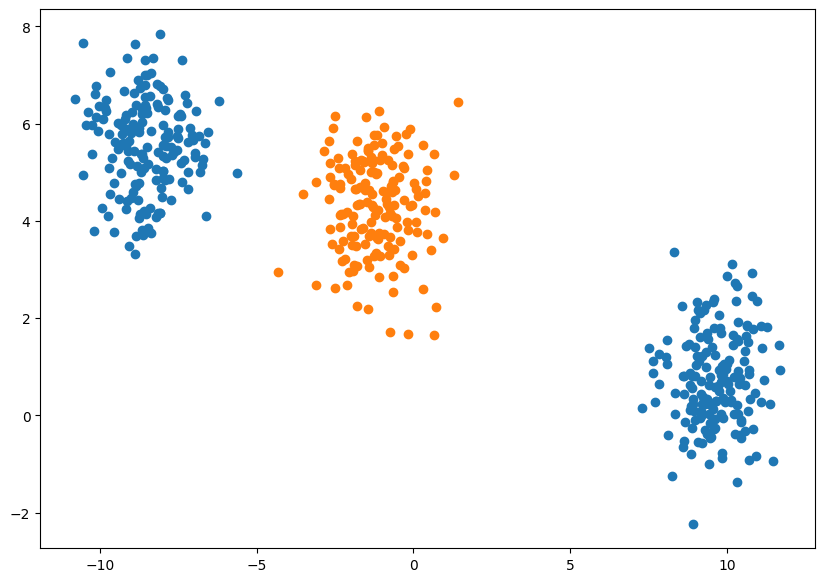

In [34]:
X, y = make_blobs(n_samples=500, centers=3, random_state=7)
y[y == 2] = 0
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = y == label
    ax.scatter(X[mask, 0], X[mask, 1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.svm import SVC

# clf = SVC(kernel="linear", random_state=0)
clf = SVC(kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_pred = clf.predict(X_test)

print("Test accuracy: %.4f" % accuracy_score(y_test, y_pred))

Test accuracy: 1.0000


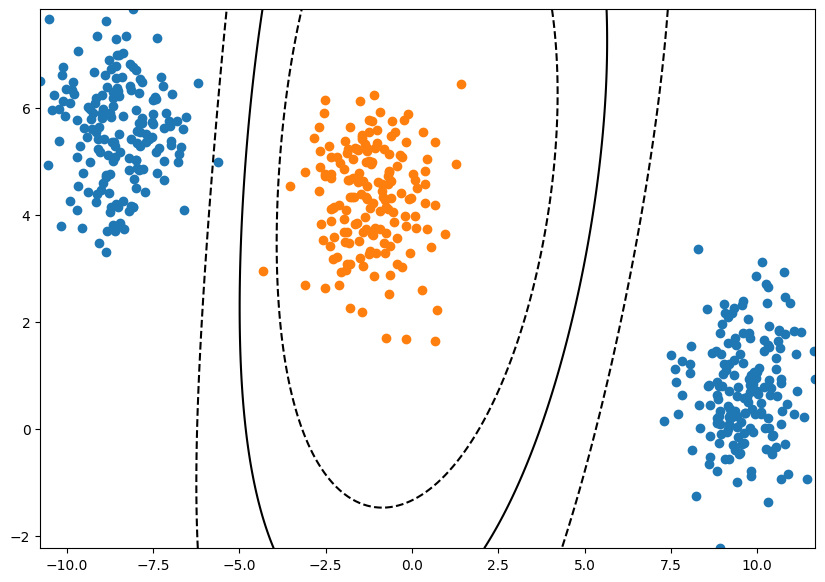

In [38]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

fig, ax = plt.subplots()
for label in [0, 1]:
    mask = y == label
    ax.scatter(X[mask, 0], X[mask, 1])

Z = Z.reshape(XX.shape)
ax.contour(
    XX, YY, Z, colors="black", linestyles=["--", "-", "--"], levels=[-0.5, 0, 0.5]
)

### Classify digits


In [39]:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.datasets import load_digits

In [41]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

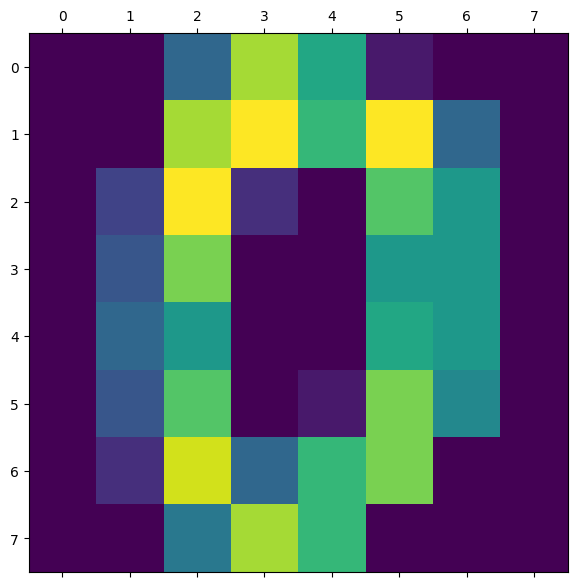

In [42]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])

In [43]:
X_train.shape

(1437, 64)

In [44]:
clf = Perceptron(max_iter=40, random_state=0)

In [45]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


In [46]:
clf = LinearSVC(C=1, random_state=0)

In [47]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  1, 32,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 37,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 37]])

Scikit-learn also includes utilities to quickly compute a cross validation score...


In [50]:
clf = LinearSVC(C=1, random_state=0)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9422, Std: 0.0147


In [51]:
clf = LinearSVC(C=0.1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9568, Std: 0.0084


... or to perform a grid search


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = LinearSVC(random_state=0)
param_grid = {"C": 10.0 ** np.arange(-6, 4)}
grid_search = GridSearchCV(
    clf, param_grid=param_grid, cv=5, verbose=3, return_train_score=True
)

In [54]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......C=1e-06;, score=(train=0.883, test=0.844) total time=   0.0s
[CV 2/5] END .......C=1e-06;, score=(train=0.880, test=0.865) total time=   0.0s
[CV 3/5] END .......C=1e-06;, score=(train=0.869, test=0.909) total time=   0.0s
[CV 4/5] END .......C=1e-06;, score=(train=0.880, test=0.840) total time=   0.0s
[CV 5/5] END .......C=1e-06;, score=(train=0.873, test=0.899) total time=   0.0s
[CV 1/5] END .......C=1e-05;, score=(train=0.929, test=0.906) total time=   0.0s
[CV 2/5] END .......C=1e-05;, score=(train=0.930, test=0.917) total time=   0.0s
[CV 3/5] END .......C=1e-05;, score=(train=0.923, test=0.944) total time=   0.0s
[CV 4/5] END .......C=1e-05;, score=(train=0.933, test=0.906) total time=   0.0s
[CV 5/5] END .......C=1e-05;, score=(train=0.925, test=0.937) total time=   0.0s
[CV 1/5] END ......C=0.0001;, score=(train=0.963, test=0.938) total time=   0.0s
[CV 2/5] END ......C=0.0001;, score=(train=0.964

d:\workspace\ai-ml-engineering\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .......C=100.0;, score=(train=0.997, test=0.937) total time=   0.2s
[CV 5/5] END .......C=100.0;, score=(train=0.998, test=0.923) total time=   0.1s
[CV 1/5] END ......C=1000.0;, score=(train=0.999, test=0.917) total time=   0.1s
[CV 2/5] END ......C=1000.0;, score=(train=0.999, test=0.951) total time=   0.1s
[CV 3/5] END ......C=1000.0;, score=(train=0.999, test=0.923) total time=   0.0s


d:\workspace\ai-ml-engineering\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\workspace\ai-ml-engineering\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ......C=1000.0;, score=(train=0.997, test=0.937) total time=   0.1s
[CV 5/5] END ......C=1000.0;, score=(train=0.998, test=0.923) total time=   0.1s


,estimator,LinearSVC(random_state=0)
,param_grid,"{'C': array([1.e-06...e+02, 1.e+03])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,penalty,'l2'


In [55]:
print(grid_search.best_params_)

{'C': np.float64(0.001)}


In [56]:
print(grid_search.best_score_)

0.9672981997677119


In [57]:
y_pred = grid_search.predict(X_test)
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))

Accuracy: 0.9639


And a lot more features!
We have only looked at some classification models and some model selection features, but sklearn can also be used for regression,


## Pandas


In [58]:
import pandas as pd

[Pandas](http://pandas.pydata.org) is a library that provides a set of tools for data analysis (Python Data Analysis Library).


Pandas dataframes can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)


In [59]:
# df = pd.read_csv("file.csv")

Pandas dataframes can also be created directly from a dictionary of arrays.


In [60]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.02767444, 0.02220902, 0.02383604, 0.02702403, 0.02643299,
       0.03431001, 0.07563186, 0.14966116, 0.18852458, 0.18438373]), 'std_fit_time': array([0.00541361, 0.0032905 , 0.00385996, 0.00175596, 0.00191098,
       0.0035418 , 0.01170345, 0.0405423 , 0.06142456, 0.04201933]), 'mean_score_time': array([0.00088401, 0.00065961, 0.00072021, 0.00065112, 0.00061584,
       0.00070486, 0.0008069 , 0.00096478, 0.00063877, 0.0009511 ]), 'std_score_time': array([2.38592961e-04, 5.79992778e-05, 1.34818267e-04, 6.29137797e-05,
       4.81629135e-05, 5.12673351e-05, 3.57974825e-04, 6.05070817e-04,
       5.01786778e-05, 6.60083741e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                   100.0, 1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), 'params': [{'C': np.float64(1e-06)}, {'C': np.float64(1e-05)}, {'C': np.float64(0.0001)

In [61]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027674,0.005414,0.000884,0.000239,0.000001,{'C': 1e-06},0.843750,0.864583,0.909408,0.839721,...,0.871283,0.028349,10,0.882507,0.879896,0.868696,0.880000,0.873043,0.876828,0.005141
1,0.022209,0.003290,0.000660,0.000058,0.000010,{'C': 1e-05},0.906250,0.916667,0.944251,0.905923,...,0.922075,0.015897,9,0.928634,0.930374,0.922609,0.933043,0.925217,0.927975,0.003695
2,0.023836,0.003860,0.000720,0.000135,0.000100,{'C': 0.0001},0.937500,0.940972,0.968641,0.937282,...,0.950607,0.014783,4,0.963446,0.964317,0.960000,0.961739,0.957391,0.961379,0.002483
3,0.027024,0.001756,0.000651,0.000063,0.001000,{'C': 0.001},0.961806,0.965278,0.968641,0.961672,...,0.967298,0.006432,1,0.982594,0.982594,0.982609,0.980870,0.981739,0.982081,0.000691
4,0.026433,0.001911,0.000616,0.000048,0.010000,{'C': 0.01},0.958333,0.961806,0.968641,0.961672,...,0.964516,0.005071,2,0.993037,0.993908,0.995652,0.993043,0.993913,0.993911,0.000954
5,0.034310,0.003542,0.000705,0.000051,0.100000,{'C': 0.1},0.954861,0.972222,0.947735,0.958188,...,0.956845,0.008448,3,0.997389,0.996519,0.998261,0.995652,0.995652,0.996695,0.001014
6,0.075632,0.011703,0.000807,0.000358,1.000000,{'C': 1.0},0.927083,0.968750,0.930314,0.940767,...,0.942233,0.014703,5,0.999130,0.998259,0.998261,0.996522,0.997391,0.997913,0.000886
7,0.149661,0.040542,0.000965,0.000605,10.000000,{'C': 10.0},0.920139,0.954861,0.923345,0.937282,...,0.933188,0.012344,6,0.999130,0.999130,0.999130,0.996522,0.998261,0.998434,0.001014
8,0.188525,0.061425,0.000639,0.000050,100.000000,{'C': 100.0},0.916667,0.951389,0.923345,0.937282,...,0.930406,0.012458,7,0.999130,0.999130,0.999130,0.996522,0.998261,0.998434,0.001014
9,0.184384,0.042019,0.000951,0.000660,1000.000000,{'C': 1000.0},0.916667,0.951389,0.923345,0.937282,...,0.930406,0.012458,7,0.999130,0.999130,0.999130,0.997391,0.998261,0.998608,0.000695


Pandas columns are also Numpy arrays, so they obey to the same indexing magic


In [62]:
df[df["param_C"] < 0.01]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027674,0.005414,0.000884,0.000239,0.000001,{'C': 1e-06},0.843750,0.864583,0.909408,0.839721,...,0.871283,0.028349,10,0.882507,0.879896,0.868696,0.880000,0.873043,0.876828,0.005141
1,0.022209,0.003290,0.000660,0.000058,0.000010,{'C': 1e-05},0.906250,0.916667,0.944251,0.905923,...,0.922075,0.015897,9,0.928634,0.930374,0.922609,0.933043,0.925217,0.927975,0.003695
2,0.023836,0.003860,0.000720,0.000135,0.000100,{'C': 0.0001},0.937500,0.940972,0.968641,0.937282,...,0.950607,0.014783,4,0.963446,0.964317,0.960000,0.961739,0.957391,0.961379,0.002483
3,0.027024,0.001756,0.000651,0.000063,0.001000,{'C': 0.001},0.961806,0.965278,0.968641,0.961672,...,0.967298,0.006432,1,0.982594,0.982594,0.982609,0.980870,0.981739,0.982081,0.000691


They also provide most functionality you would expect as database user (`df.sort_values`, `df.groupby`, `df.join`, `df.concat`, etc.)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8572\2598372961.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["param_C"])


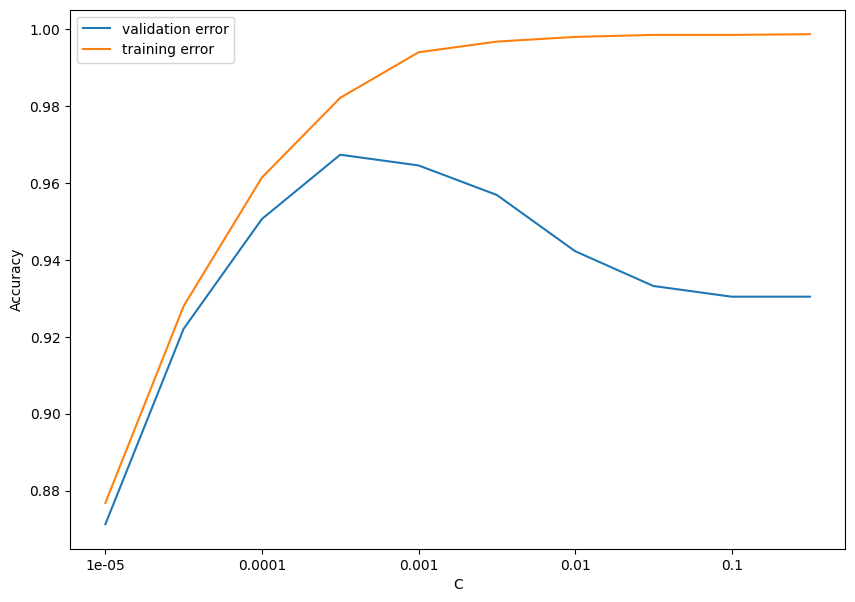

In [63]:
fig, ax = plt.subplots()
ax.plot(df["mean_test_score"], label="validation error")
ax.plot(df["mean_train_score"], label="training error")
ax.set_xticklabels(df["param_C"])
ax.set_xlabel("C")
ax.set_ylabel("Accuracy")
ax.legend(loc="best")

## Other packages


Other packages that didn't make the cut:

- [Plotly](https://plot.ly) and [Seaborn](http://seaborn.pydata.org): two other plotting libraries
- [Scipy](https://www.scipy.org): a science library built on top of Numpy
- [Scrapy](https://www.scipy.org): a web crawling library
- [pdb](https://docs.python.org/3/library/pdb.html): a debugger for python (not ML-specific but terribly useful)
- [tqdm](https://github.com/tqdm/tqdm): a progress bar (not ML-specific)

Next time:

- [Pytorch](https://pytorch.org)
